### Importing Dependencies

In [29]:
import os
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas as pd

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

### Data preview and shape

In [36]:
df = pd.read_csv('dataset/raw_data.csv')

In [37]:
df.head(5)
list(df.columns)

['age',
 'gender',
 'education',
 'marital_status',
 'monthly_income',
 'limit_diet',
 'gain_10kg',
 'gain_lose_3kg',
 'eat_2h_sleep',
 'soft_drink',
 'fast_food',
 'skip_breakfast',
 'eat_faster',
 'walking_habit',
 'physical_activity',
 'walk_faster',
 'sleep_habit',
 'stop_activity',
 'height',
 'weight',
 'waist',
 'hip',
 'body_temperature',
 'spo2',
 'bp_sys',
 'bp_dia',
 'blood_glucose',
 'blood_hemoglobin',
 'urinary_glucose',
 'urinary_protein',
 'pulse_rate',
 'uric_acid',
 'health_status']

In [25]:
df.shape

(50, 33)

### removing unnecessary columns

In [26]:
data = df.drop( columns = ['education', 'marital_status', 'monthly_income'], axis=1)

### Changing string value to numerical values

In [27]:
data.head()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,spo2,bp_sys,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status
0,59,Male,No,1. No,1. No,1. No,1. No,1. No,2. Yes,1. No,...,96,138,78,234 (PBS),NaN,-,-,94,4.3,3
1,60,Male,Yes,2. Yes,1. No,2. Yes,1. No,1. No,1. No,2. Yes,...,96,128,67,93.6 (PBS),NaN,-,-,62,5.8,2
2,58,Male,Yes,2. Yes,2. Yes,2. Yes,1. No,1. No,1. No,2. Yes,...,96,140,81,133.2 (PBS),NaN,-,-,60,7.0,3
3,50,Female,Yes,1. No,1. No,2. Yes,2. Yes,1. No,1. No,1. No,...,99,102,65,75.6 (PBS),10.9,-,-,82,3.6,2
4,56,Male,Yes,1. No,1. No,2. Yes,1. No,1. No,1. No,2. Yes,...,96,155,98,223.2 (PBS),NaN,-,-,92,5.0,3


In [28]:
# gender 
data.replace({'Male': 1, 'Female': 2}, inplace=True)

# limit_diet
data.replace({'Yes': 1, 'No': 0}, inplace=True)

#gain_10kg , gain_lose_3kg, eat_2h_sleep, soft_drink, fast_food, skip_breakfast, eat_faster, walk_faster
data.replace({ '1. No':0, '2. Yes': 1, "3. Don't Know":3}, inplace=True)

# some values of gain_10kg
data.replace({ '1.  No':0}, inplace=True)

#walking_habit
data.replace({'1. More than 1 hour per day': 1, '2. Less than 1 hour per day': 2, '3. Don壽猼 go outside for walk':3}, inplace=True)

# sleep_habit
data.replace({'1. Never': 1, '2. Rarely (1-5 days per month)': 2, '3. Sometimes (6-10 days per month)':3, '5. Always (everyday)':5 }, inplace=True)

#blood_glucose removing (PBS)
data['blood_glucose'] = data['blood_glucose'].str.rstrip(' (PBS)')

# urinary_glucose
data.replace({'-': 0, '++': 1,}, inplace=True)

#unirary_protein
data.replace({'+': 1,}, inplace=True)

data.head()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,spo2,bp_sys,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status
0,59,1,0,0,0,0,0,0,1,0,...,96,138,78,234,NaN,0,0,94,4.3,3
1,60,1,1,1,0,1,0,0,0,1,...,96,128,67,93.6,NaN,0,0,62,5.8,2
2,58,1,1,1,1,1,0,0,0,1,...,96,140,81,133.2,NaN,0,0,60,7.0,3
3,50,2,1,0,0,1,1,0,0,0,...,99,102,65,75.6,10.9,0,0,82,3.6,2
4,56,1,1,0,0,1,0,0,0,1,...,96,155,98,223.2,NaN,0,0,92,5.0,3


### generating derived feature BMI and w/h

In [9]:
data['bmi'] = round((data.weight / pow(data.height,2))*10000, 2)
data['wh'] = round(data.waist / data.hip,2)

### dropping composition elements of bmi

In [10]:
data = data.drop( columns = ['height', 'weight', 'waist', 'hip'], axis=1)

### saving cleanded data

In [11]:
data.to_csv('dataset/cleaned_data.csv')

<AxesSubplot:>

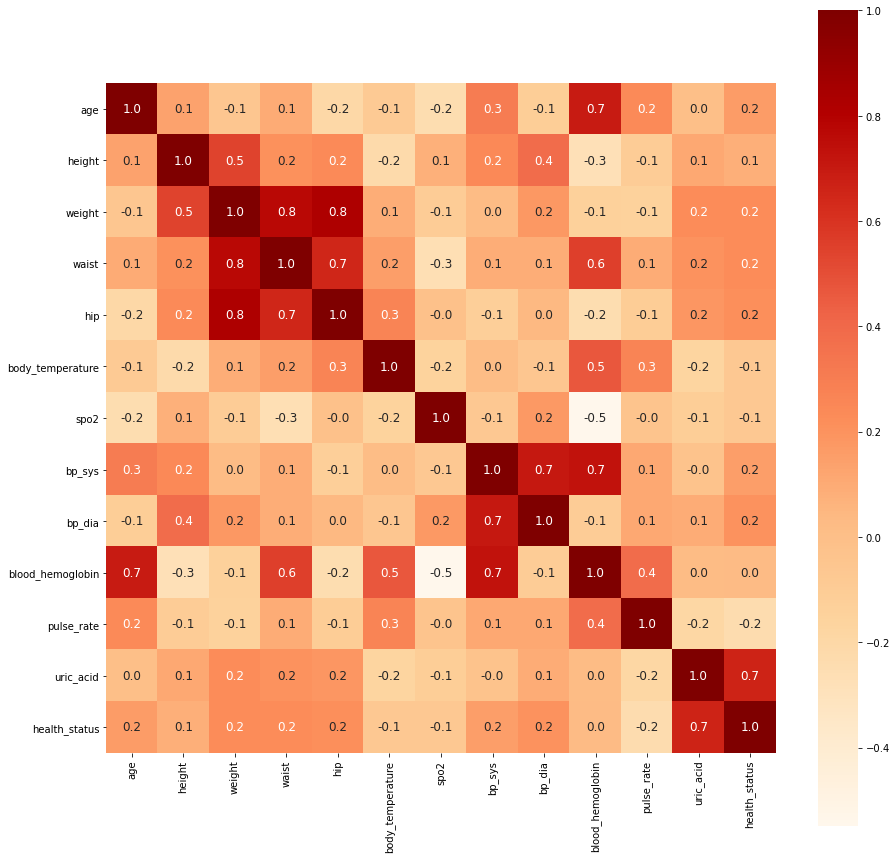

In [12]:
correlation = df.corr()

# constructing a heatmap to undestand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap = 'OrRd')